<a href="https://colab.research.google.com/github/david5421/IS_170_Binder/blob/Lab9/Lab9_RegressionModel%2CBautista(BINDER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 9 Logistic Regression

David Bautista

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD)

https://www.kaggle.com/datasets/naveengowda16/logistic-regression-heart-disease-prediction

https://www.kaggle.com/code/lvishalraju/heart-disease-prediction/notebook

https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression/notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('heartd.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
#'All' Columns are important and 'TenYearCHD' is the dependent variable
x=df.iloc[:,[##]].values   ## All the other features
y=df.iloc[:,##].values      ## we need to make our target the last column, i think thats -1 in replace of #?

We would need to clean the data set and remove the NaN, normalize the 0s, and drop the columns we dont need, starting with education.

In [ ]:
#splitting the dataset into training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

In [ ]:

from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)


In [ ]:

#fitting logistic regression to the training set

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#For more info on the LogitsticRegression and its parameters, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#andom_state: Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. 
#Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter, e.g. shuffle, being set.
#The passed value will have an effect on the reproducibility of the results returned by the function

LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(C=1.0,class_weight=None, dual=False,fit_intercept=True,
                   intercept_scaling=1,l1_ratio=None, max_iter=100,
                   multi_class='warn',n_jobs=None,penalty=12,
                   random_state=0,solver='warn',tol=0.0001,verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty=12, random_state=0,
                   solver='warn')

In [ ]:
#predicting the test set result
y_pred=classifier.predict(x_test)


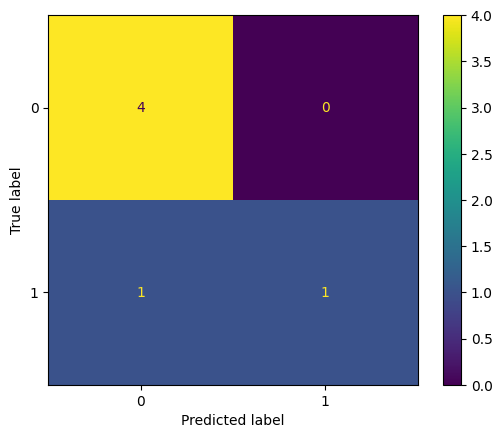

In [ ]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
